In [1]:
import numpy as np
from qiskit import*
import math as m
from scipy import linalg as la
import matplotlib.pyplot as plt
import pylatexenc
from qiskit.quantum_info import*
from qiskit.visualization import*
from itertools import chain
%matplotlib inline

#we need this line to simulate the quantum circuit

sim = Aer.get_backend('aer_simulator')

In [2]:
# In this code I have set up several quantum circuits for which to test information propagation through. The end goal will be to
# find quantum coherent information which is directly related to the channel capacity. The Channel Capacity is a measurement of
# entanglement propogation through a given quantum channel. For these circuits Qubit 0 and Qubit 1 start as a maximally
# entangled bell pair. We then aim to propagate the entanglement from Qubits 0 and 1 to Qubits 0 and 3. This can be shown in the
# following two measurements; If two states are maximally entangled the Quantum Mutual Information between the states is 2
# if the quantum information channel has successfully passed the entanglement through the Maximal Coherent information will be 1

In [3]:
# Assigning the parameters used in intializing our state. 

x1 = float(m.sqrt(1/2))
x2 = 0;
c_1 = 1/(np.sqrt(2))
c_2 = c_1*1j
print(x1, x2)


# We use these lines to Entangle Qubits 0 and 1 initially in a bell pair shaped as 1/Sqrt{2}(|01>+|10>).

IS1 =[0,x1,x1,0,0,0,0,0]

IS2 = [1,0]

IS = np.kron(IS2,IS1)

print(IS)


0.7071067811865476 0
[0.         0.70710678 0.70710678 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [4]:
# #Drawing the quantum circuit. This circuit demonstrates a channel that does not propogate entanglement. 

# qr_1 = QuantumRegister(4)
# qc_test = QuantumCircuit(qr_1)
# initial_state=[x1,0,0,x1,0,0,0,0,0,0,0,0,0,0,0,0]
# qc_test.initialize(initial_state,[0,1,2,3])
# v1 = qc_test.save_statevector(label='v1')
# qc_test.x(1)
# qc_test.x(2)
# v15 = qc_test.save_statevector(label='v1.5')
# qc_test.x(2)
# qc_test.x(3)

# v2 = qc_test.save_statevector(label='v2')
# qc_testj = assemble(qc_test)
# result = sim.run(qc_testj).result()
# qc_test.draw(output='mpl')

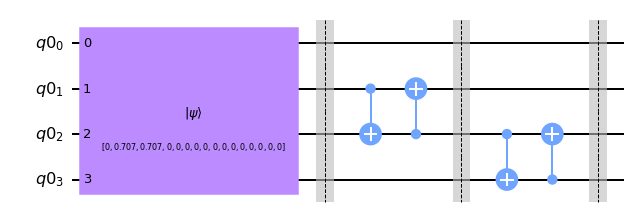

In [5]:
# Drawing the quantum circuit. This specific Circuit is similar to swap gates 
# but transmits entanglement only if quibt two is initially in the zero state.

qr_1 = QuantumRegister(4)
qc_test = QuantumCircuit(qr_1)
initial_state=IS
qc_test.initialize(initial_state,[0,1,2,3])
v1 = qc_test.save_statevector(label='v1')
qc_test.cx(1,2)
qc_test.cx(2,1)
v15 = qc_test.save_statevector(label='v15')
qc_test.cx(2,3)
qc_test.cx(3,2)

v2 = qc_test.save_statevector(label='v2')
qc_testj = assemble(qc_test)
result = sim.run(qc_testj).result()
qc_test.draw(output='mpl')

In [6]:
# #Drawing the quantum circuit. 
# #The Swap gate demonstrates a perfect quantum channel, passing entanglement from qubit 1 to qubit 3. 

# qr_1 = QuantumRegister(4)
# qc_test = QuantumCircuit(qr_1)
# initial_state=[x1,0,0,x1,0,0,0,0,0,0,0,0,0,0,0,0]
# qc_test.initialize(initial_state,[0,1,2,3])
# v1 = qc_test.save_statevector(label='v1')
# qc_test.swap(1,2)
# qc_test.swap(2,3)


# v2 = qc_test.save_statevector(label='v2')
# qc_testj = assemble(qc_test)
# result = sim.run(qc_testj).result()
# qc_test.draw(output='mpl')


In [8]:
# Display the input and output state vector. Here we can see the entanlged bell pair of qubits 0 and 1 and
# tensored with the zero state of qubits 2 and 3. 

psi_test_input = result.data(0)['v1']
psi_test_output = result.data(0)['v2']


display(psi_test_input.draw('latex'),
        psi_test_output.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
#Define Density Matrices for the circuit above. 

rho_in = DensityMatrix(psi_test_input)
rho_out = DensityMatrix(psi_test_output)


rho_in.draw('latex')
rho_out.draw('latex')

<IPython.core.display.Latex object>

In [14]:
# Density Matrices tracing over qubits. The Partial Trace command traces over the qubits in the []. Giving us
# reduced density matrices for our entropy calculations. 

rho_01_in = partial_trace(rho_in,[2,3])
rho_01_out = partial_trace(rho_out,[2,3])
rho_02_in = partial_trace(rho_in,[1,3])
rho_02_out = partial_trace(rho_out,[1,3])
rho_03_in = partial_trace(rho_in,[1,2])
rho_03_out = partial_trace(rho_out,[1,2])
rho_23_in = partial_trace(rho_in,[0,1])
rho_23_out = partial_trace(rho_out,[0,1])
rho_13_out = partial_trace(rho_out,[0,2])
rho_04_out = partial_trace(rho_out,[1,3])

# Our Quantum channel is defined as Qubit 1 -> Qubit 3 so these are the density matrices associated with that. 

rho_123_in = partial_trace(rho_in,[0])
rho_123_out = partial_trace(rho_out,[0])

#output state read on qubit from the quantum channel. Reduced density matrices of individual qubits.

rho_0_in = partial_trace(rho_in,[1,2,3])
rho_0_out = partial_trace(rho_out,[1,2,3])
rho_1_in = partial_trace(rho_in,[0,2,3])
rho_1_out = partial_trace(rho_out,[0,2,3])
rho_2_in = partial_trace(rho_in,[0,1,3])
rho_2_out = partial_trace(rho_out,[0,1,3])
rho_3_in = partial_trace(rho_in,[0,1,2])
rho_3_out = partial_trace(rho_out,[0,1,2])

# These code lines make for pretty density matrices. 

display(rho_01_in.draw('latex', prefix=" \\rho_{01\_in} = "),
        rho_01_out.draw('latex', prefix=" \\rho_{01\_out} = "),
        rho_03_in.draw('latex', prefix=" \\rho_{03\_in} = "),
        rho_03_out.draw('latex', prefix=" \\rho_{03\_out} = "),
        rho_3_out.draw('latex', prefix=" \\rho_{3\_out} = "),
        rho_123_out.draw('latex', prefix=" \\rho_{123\_out} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
#Von Nuemann Entropies can indicate how mixed a state is. Qiskit makes calculating the entropy easy!

print(entropy(rho_01_in),entropy(rho_01_out))

# If the entropy is zero then the state is pure. Entropy > 0 indicates a mixed state. 

1.6017132519074586e-16 0.9999999999999999


In [16]:
# Another check for purity is from the definition of purity Trace(rho^2) = 1 
rho_01_in_squared = np.matmul(rho_01_in,rho_01_in)
purity1=np.matrix.trace(rho_01_in_squared)
print(purity1)

(1.0000000000000004+0j)


In [19]:
# Using Quantum Mutual information (QMI) we can explore the entanglement as it passes from qubits 0 and 1 to qubits 0 and 3. 
# Remember, a QMI value of 2 means maximal entanglement, whereas a QMI of 0 means no entanglement. 

print(mutual_information(rho_01_in),mutual_information(rho_01_out))
print(mutual_information(rho_03_in),mutual_information(rho_03_out))



1.9999999999999996 0.0
0.0 1.9999999999999996


In [22]:
# Coherent Information through the quantum channel. A value of 1 means perfect quantum communication. A value of zero
# indicates your channel is entanglement breaking. 
entropy(rho_0_out) - entropy(rho_03_out)

0.9999999999999998

# 